# Fully connected networks

In the previous notebook, you implemented a simple two-layer neural network class.  However, this class is not modular.  If you wanted to change the number of layers, you would need to write a new loss and gradient function.  If you wanted to optimize the network with different optimizers, you'd need to write new training functions.  If you wanted to incorporate regularizations, you'd have to modify the loss and gradient function.  

Instead of having to modify functions each time, for the rest of the class, we'll work in a more modular framework where we define forward and backward layers that calculate losses and gradients respectively.  Since the forward and backward layers share intermediate values that are useful for calculating both the loss and the gradient, we'll also have these function return "caches" which store useful intermediate values.

The goal is that through this modular design, we can build different sized neural networks for various applications.

In this HW #3, we'll define the basic architecture, and in HW #4, we'll build on this framework to implement different optimizers and regularizations (like BatchNorm and Dropout).

CS231n has built a solid API for building these modular frameworks and training them, and we will use their very well implemented framework as opposed to "reinventing the wheel."  This includes using their Solver, various utility functions, and their layer structure.  This also includes nndl.fc_net, nndl.layers, and nndl.layer_utils.  As in prior assignments, we thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  

## Modular layers

This notebook will build modular layers in the following manner.  First, there will be a forward pass for a given layer with inputs (`x`) and return the output of that layer (`out`) as well as cached variables (`cache`) that will be used to calculate the gradient in the backward pass.

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

In [8]:
## Import and setups

import time
import numpy as np
import matplotlib.pyplot as plt
from nndl.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k in data.keys():
  print('{}: {} '.format(k, data[k].shape))

X_train: (49000, 3, 32, 32) 
y_train: (49000,) 
X_val: (1000, 3, 32, 32) 
y_val: (1000,) 
X_test: (1000, 3, 32, 32) 
y_test: (1000,) 


## Linear layers

In this section, we'll implement the forward and backward pass for the linear layers.

The linear layer forward pass is the function `affine_forward` in `nndl/layers.py` and the backward pass is `affine_backward`.

After you have implemented these, test your implementation by running the cell below.

### Affine layer forward pass

Implement `affine_forward` and then test your code by running the following cell.

In [14]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference: {}'.format(rel_error(out, correct_out)))

(2, 4, 5, 6)
(120, 3)
(2, 120)
(2, 3)
Testing affine_forward function:
difference: 9.769849468192957e-10


### Affine layer backward pass

Implement `affine_backward` and then test your code by running the following cell.

In [16]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6, 5)
(10, 6)
(10, 5)
(10, 2, 3)
(6,

## Activation layers

In this section you'll implement the ReLU activation.

### ReLU forward pass

Implement the `relu_forward` function in `nndl/layers.py` and then test your code by running the following cell.

In [17]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print('Testing relu_forward function:')
print('difference: {}'.format(rel_error(out, correct_out)))

Testing relu_forward function:
difference: 4.999999798022158e-08


### ReLU backward pass
Implement the `relu_backward` function in `nndl/layers.py` and then test your code by running the following cell.

In [18]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: {}'.format(rel_error(dx_num, dx)))

Testing relu_backward function:
dx error: 3.2756045832601377e-12


## Combining the affine and ReLU layers

Often times, an affine layer will be followed by a ReLU layer. So let's make one that puts them together.  Layers that are combined are stored in `nndl/layer_utils.py`.  

### Affine-ReLU layers
We've implemented `affine_relu_forward()` and `affine_relu_backward` in ``nndl/layer_utils.py``.  Take a look at them to make sure you understand what's going on.  Then run the following cell to ensure its implemented correctly.

In [19]:
from nndl.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

Testing affine_relu_forward and affine_relu_backward:
dx error: 5.429504872672795e-11
dw error: 4.721219316279193e-11
db error: 7.826672585685604e-12


## Softmax and SVM losses

You've already implemented these, so we have written these in `layers.py`.  The following code will ensure they are working correctly.

In [20]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be 1e-9
print('Testing svm_loss:')
print('loss: {}'.format(loss))
print('dx error: {}'.format(rel_error(dx_num, dx)))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print('\nTesting softmax_loss:')
print('loss: {}'.format(loss))
print('dx error: {}'.format(rel_error(dx_num, dx)))

Testing svm_loss:
loss: 9.001719351930538
dx error: 8.182894472887002e-10

Testing softmax_loss:
loss: 2.302757516406065
dx error: 7.310999691522884e-09


## Implementation of a two-layer NN

In `nndl/fc_net.py`, implement the class `TwoLayerNet` which uses the layers you made here.  When you have finished, the following cell will test your implementation.

In [23]:
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-2
model = TwoLayerNet(input_dim=D, hidden_dims=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = {}'.format(reg))
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('{} relative error: {}'.format(name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg = 0.0
W1 relative error: 1.8336562786695002e-08
W2 relative error: 3.201560569143183e-10
b1 relative error: 9.828315204644842e-09
b2 relative error: 4.329134954569865e-10
Running numeric gradient check with reg = 0.7
W1 relative error: 2.5279152310200606e-07
W2 relative error: 2.8508510893102143e-08
b1 relative error: 1.564679947504764e-08
b2 relative error: 9.089617896905665e-10


## Solver 

We will now use the cs231n Solver class to train these networks.  Familiarize yourself with the API in `cs231n/solver.py`.  After you have done so, declare an instance of a TwoLayerNet with 200 units and then train it with the Solver.  Choose parameters so that your validation accuracy is at least 50%.

In [24]:
model = TwoLayerNet()
solver = None

# ================================================================ #
# YOUR CODE HERE:
#   Declare an instance of a TwoLayerNet and then train 
#   it with the Solver. Choose hyperparameters so that your validation 
#   accuracy is at least 50%.  We won't have you optimize this further
#   since you did it in the previous notebook.
#
# ================================================================ #

model = TwoLayerNet(hidden_dims=200, reg = 0.3)
solver = Solver(model, data,
                  update_rule='sgd',
                  optim_config={
                    'learning_rate': 8.5*1e-4,
                  },
                  lr_decay=0.95,
                  num_epochs=10, batch_size=215,
                  print_every=100)
solver.train()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

(Iteration 1 / 2270) loss: 2.394947
(Epoch 0 / 10) train acc: 0.119000; val_acc: 0.118000
(Iteration 101 / 2270) loss: 1.854744
(Iteration 201 / 2270) loss: 1.855410
(Epoch 1 / 10) train acc: 0.395000; val_acc: 0.419000
(Iteration 301 / 2270) loss: 1.631372
(Iteration 401 / 2270) loss: 1.602840
(Epoch 2 / 10) train acc: 0.441000; val_acc: 0.460000
(Iteration 501 / 2270) loss: 1.623263
(Iteration 601 / 2270) loss: 1.654849
(Epoch 3 / 10) train acc: 0.474000; val_acc: 0.476000
(Iteration 701 / 2270) loss: 1.719426
(Iteration 801 / 2270) loss: 1.586326
(Iteration 901 / 2270) loss: 1.430789
(Epoch 4 / 10) train acc: 0.509000; val_acc: 0.500000
(Iteration 1001 / 2270) loss: 1.524871
(Iteration 1101 / 2270) loss: 1.525496
(Epoch 5 / 10) train acc: 0.502000; val_acc: 0.508000
(Iteration 1201 / 2270) loss: 1.358757
(Iteration 1301 / 2270) loss: 1.324769
(Epoch 6 / 10) train acc: 0.536000; val_acc: 0.481000
(Iteration 1401 / 2270) loss: 1.328393
(Iteration 1501 / 2270) loss: 1.192861
(Epoch 7 /

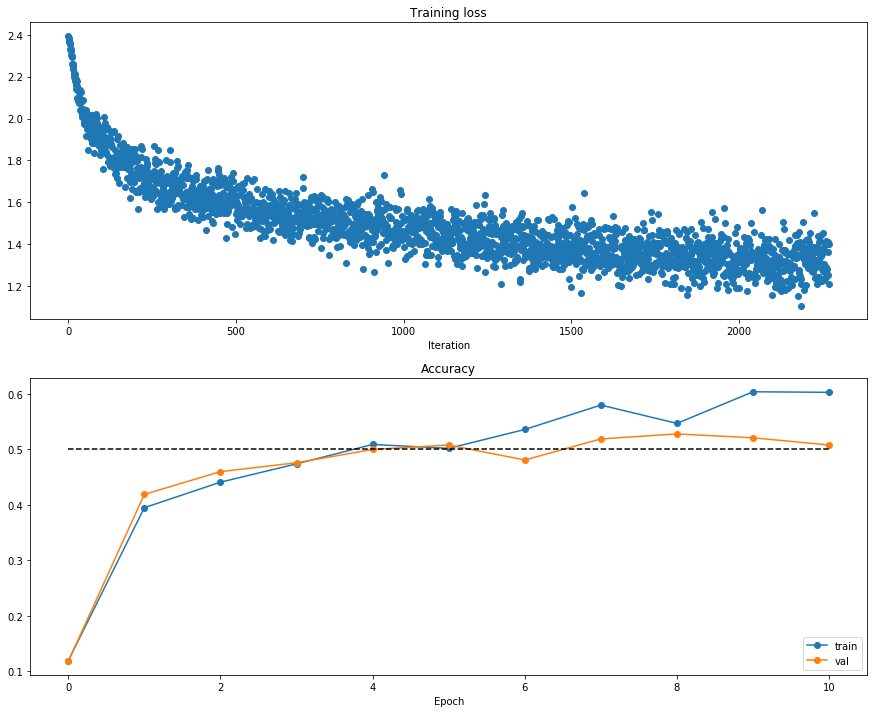

In [25]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Multilayer Neural Network

Now, we implement a multi-layer neural network.

Read through the `FullyConnectedNet` class in the file `nndl/fc_net.py`.

Implement the initialization, the forward pass, and the backward pass.  There will be lines for batchnorm and dropout layers and caches; ignore these all for now.  That'll be in assignment #4.

In [34]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print('Running check with reg = {}'.format(reg))
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  print('Initial loss: {}'.format(loss))

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print('{} relative error: {}'.format(name, rel_error(grad_num, grads[name])))

Running check with reg = 0
Initial loss: 2.3055851841704564
W1 relative error: 1.6459365175955762e-06
W2 relative error: 5.948940392298457e-06
W3 relative error: 3.849028103425992e-08
b1 relative error: 6.242692702622136e-09
b2 relative error: 1.2474949919506178e-08
b3 relative error: 1.5904871987894762e-10
Running check with reg = 3.14
Initial loss: 7.476141544673438
W1 relative error: 1.4354503693818174e-08
W2 relative error: 4.510745728255452e-06
W3 relative error: 2.980026998181932e-08
b1 relative error: 9.93975404198091e-09
b2 relative error: 7.439347851187856e-08
b3 relative error: 2.0080772123295608e-10


(Iteration 1 / 40) loss: 2.404026
(Epoch 0 / 20) train acc: 0.260000; val_acc: 0.120000
(Epoch 1 / 20) train acc: 0.180000; val_acc: 0.128000
(Epoch 2 / 20) train acc: 0.300000; val_acc: 0.153000
(Epoch 3 / 20) train acc: 0.500000; val_acc: 0.162000
(Epoch 4 / 20) train acc: 0.580000; val_acc: 0.170000
(Epoch 5 / 20) train acc: 0.740000; val_acc: 0.169000
(Iteration 11 / 40) loss: 1.121943
(Epoch 6 / 20) train acc: 0.640000; val_acc: 0.141000
(Epoch 7 / 20) train acc: 0.800000; val_acc: 0.179000
(Epoch 8 / 20) train acc: 0.820000; val_acc: 0.161000
(Epoch 9 / 20) train acc: 0.920000; val_acc: 0.179000
(Epoch 10 / 20) train acc: 0.980000; val_acc: 0.181000
(Iteration 21 / 40) loss: 0.221367
(Epoch 11 / 20) train acc: 0.980000; val_acc: 0.188000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.201000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.194000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.199000
(Epoch 15 / 20) train acc: 0.800000; val_acc: 0.191000
(Iteration 31 / 40) loss: 

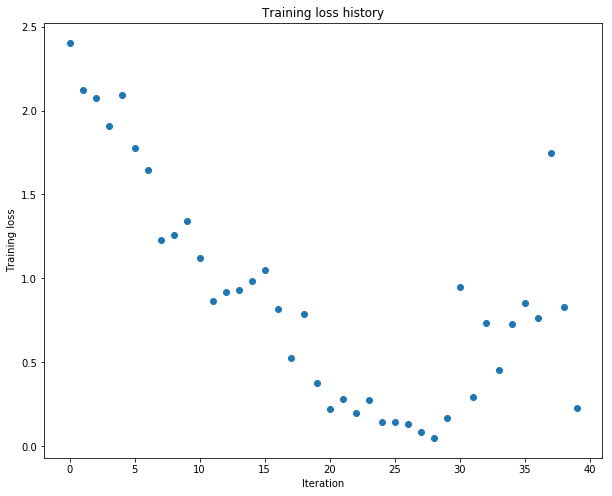

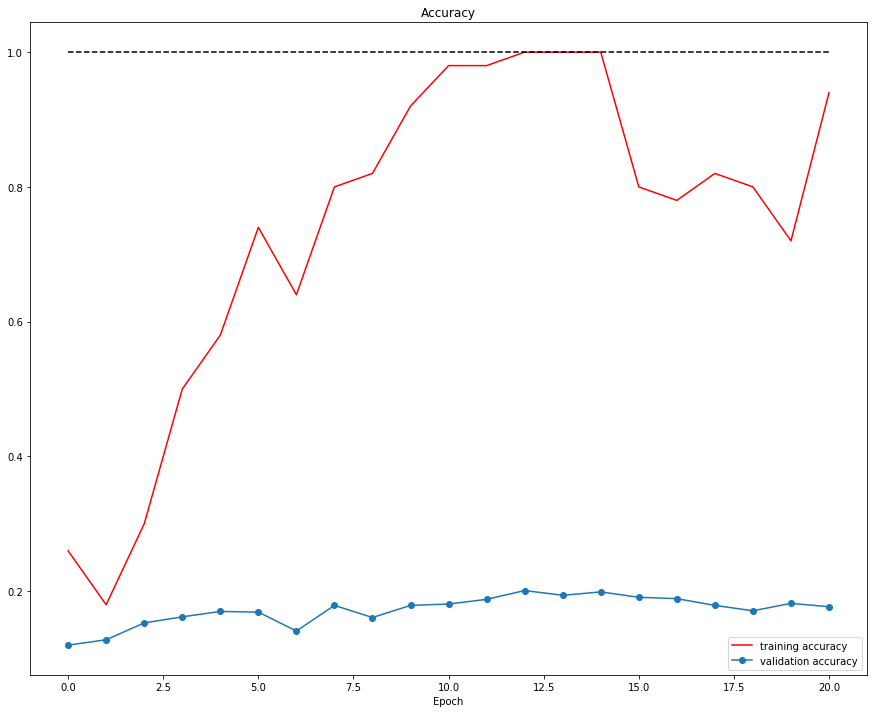

In [33]:
# Use the three layer neural network to overfit a small dataset.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}


#### !!!!!!
# Play around with the weight_scale and learning_rate so that you can overfit a small dataset.
# Your training accuracy should be 1.0 to receive full credit on this part.
weight_scale = 1e-2
learning_rate = 1e-2

model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()


plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-r', label='training accuracy')
plt.plot(solver.val_acc_history, '-o', label='validation accuracy')
plt.plot([1.0] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# neural_net.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

""" 
This code was originally written for CS 231n at Stanford University
(cs231n.stanford.edu).  It has been modified in various areas for use in the
ECE 239AS class at UCLA.  This includes the descriptions of what code to
implement as well as some slight potential changes in variable names to be
consistent with class nomenclature.  We thank Justin Johnson & Serena Yeung for
permission to use this code.  To see the original version, please visit
cs231n.stanford.edu.  
"""

class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network. The net has an input dimension of
  N, a hidden layer dimension of H, and performs classification over C classes.
  We train the network with a softmax loss function and L2 regularization on the
  weight matrices. The network uses a ReLU nonlinearity after the first fully
  connected layer.

  In other words, the network has the following architecture:

  input - fully connected layer - ReLU - fully connected layer - softmax

  The outputs of the second fully-connected layer are the scores for each class.
  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:

    W1: First layer weights; has shape (H, D)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (C, H)
    b2: Second layer biases; has shape (C,)

    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    self.params = {}
    self.params['W1'] = std * np.random.randn(hidden_size, input_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = std * np.random.randn(output_size, hidden_size)
    self.params['b2'] = np.zeros(output_size)


  def loss(self, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural network.

    Inputs:
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.

    Returns:
    If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].

    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    N, D = X.shape

    # Compute the forward pass
    scores = None
    

    # ================================================================ #
    # YOUR CODE HERE:
	#   Calculate the output scores of the neural network.  The result
	#   should be (N, C). As stated in the description for this class,
	#	there should not be a ReLU layer after the second FC layer.
	#	The output of the second FC layer is the output scores. Do not
	#	use a for loop in your implementation.
    # ================================================================ #
    reLu= lambda x: x*(x>0)
    #first layer before reLu
    h1_b=np.dot(X,W1.T)
    h1=reLu(np.dot(X,W1.T)+b1)
    #second layer == scores
    scores=np.dot(h1,W2.T)+b2
    
    
    HL1_pre_activation = X.dot(W1.T) + b1
    HL1_output = reLu(HL1_pre_activation) 

    #second layer
    HL2_pre_activation = HL1_output.dot(W2.T) + b2

    scores = HL2_pre_activation
    
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

  
    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # Compute the loss
    loss = None
    # ================================================================ #
    # YOUR CODE HERE:
	#   Calculate the loss of the neural network.  This includes the 
	# 	softmax loss and the L2 regularization for W1 and W2. Store the 
	#	total loss in teh variable loss.  Multiply the regularization
	# 	loss by 0.5 (in addition to the factor reg).
	# ================================================================ #


    # scores is num_examples by num_classes
    class_probabilities = np.exp(scores)/np.sum(np.exp(scores), axis=1, keepdims=True)
    #print("classes probs",class_probabilities)
    
    prob_of_correct_y = class_probabilities[np.arange(N), y]
    log_loss = -np.log(prob_of_correct_y)
    #print("all",class_probabilities)
    #print("corret ones",prob_of_correct_y)
    #print("log_loss",log_loss)
    sum_log_loss = np.sum(log_loss)
    #divide by num examples
    loss = sum_log_loss/N
    #print("sum of loss",sum_log_loss)
    #print("loss",loss)
    
    frob_norm_w1 = np.sum(W1**2)
    frob_norm_w2 = np.sum(W2**2)
    reg_w1 = 0.5*reg*frob_norm_w1
    reg_w2 = 0.5*reg*frob_norm_w2

    regularized_loss = reg_w1 + reg_w2
    loss += regularized_loss   
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    grads = {}
    

    # ================================================================ #
    # YOUR CODE HERE:
	# 	Implement the backward pass.  Compute the derivatives of the 
	# 	weights and the biases.  Store the results in the grads
	#	dictionary.  e.g., grads['W1'] should store the gradient for 
	# 	W1, and be of the same size as W1.
	# ================================================================ #
    
    #Calculating the loss function derivative according to the :
    #https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function
    
    update_scores = class_probabilities
    #print("update_scores",update_scores)
    update_scores[np.arange(N), y] -=1
    #print("after subtraction update_scores",update_scores)
    update_scores /= N
    #print("update_scores",update_scores)
    grads['W2'] = np.dot(HL1_output.T, update_scores).T
    grads['b2'] = np.sum(update_scores, axis=0)
    dHL2 = np.dot(update_scores, W2)

    dLdA = dHL2
    dLdA[HL1_output <= 0] = 0

    grads['W1'] = np.dot(dLdA.T, X)
    grads['b1'] = np.sum(dLdA, axis=0)#, keepdims=True)
    
    grads['W2'] += reg * W2
    grads['W1'] += reg * W1
    
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    return loss, grads

  def train(self, X, y, X_val, y_val,learning_rate=1e-3, learning_rate_decay=0.95,reg=1e-5, num_iters=100,batch_size=200,verbose=False):
    """
    Train this neural network using stochastic gradient descent.

    Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)
    
    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in np.arange(num_iters):
        X_batch = None
        y_batch = None
      # ================================================================ #
      # YOUR CODE HERE:
  	  # 	Create a minibatch by sampling batch_size samples randomly.
  	  # ================================================================ #
        rand_indices = np.random.choice(np.arange(num_train), batch_size)
        X_batch = X[rand_indices]
        y_batch = y[rand_indices]
    #print(X_batch)
    #print(y_batch)
      # ================================================================ #
      # END YOUR CODE HERE
      # ================================================================ #

       # Compute loss and gradients using the current minibatch
    
        loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
        loss_history.append(loss)

      # ================================================================ #
      # YOUR CODE HERE:
  	  # 	Perform a gradient descent step using the minibatch to update
	  # 	all parameters (i.e., W1, W2, b1, and b2).
  	  # ================================================================ #
        self.params['W2'] += -learning_rate * grads['W2']
        self.params['W1'] += -learning_rate * grads['W1']

        #print(self.params['b2'].shape, grads['b2'].shape)
        self.params['b2'] += -learning_rate * grads['b2']
        self.params['b1'] += -learning_rate * grads['b1']

      # ================================================================ #
      # END YOUR CODE HERE
      # ================================================================ #

        if verbose and it % 100 == 0:
            print('iteration {} / {}: loss {}'.format(it, num_iters, loss))

      # Every epoch, check train and val accuracy and decay learning rate.
        if it % iterations_per_epoch == 0:
            # Check accuracy
            train_acc = (self.predict(X_batch) == y_batch).mean()
            val_acc = (self.predict(X_val) == y_val).mean()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)

            # Decay learning rate
            learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }

  def predict(self, X):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.

    Inputs:
    - X: A numpy array of shape (N, D) giving N D-dimensional data points to
      classify.

    Returns:
    - y_pred: A numpy array of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """
    y_pred = None

    # ================================================================ #
    # YOUR CODE HERE:
    # 	Predict the class given the input data.
    # ================================================================ #
    num_examples = X.shape[0]
    y_pred = np.empty((num_examples,), dtype=int)
    HL1_input = np.dot(X, self.params['W1'].T) + self.params['b1']

    #apply RELU
    HL1_output = np.maximum(0, HL1_input)

    #second layer
    HL2_output = np.dot(HL1_output, self.params['W2'].T) + self.params['b2']

    #apply softmax
    softmax = np.exp(HL2_output)/np.sum(np.exp(HL2_output), axis=1, keepdims=True)

    #index_of_max = np.argmax(softmax)
#    print(softmax.shape)
    for i in range(num_examples):
        max_index = np.argmax(softmax[i])
        y_pred[i] = max_index


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    return y_pred





# layers.py

In [ ]:
import numpy as np
import pdb

""" 
This code was originally written for CS 231n at Stanford University
(cs231n.stanford.edu).  It has been modified in various areas for use in the
ECE 239AS class at UCLA.  This includes the descriptions of what code to
implement as well as some slight potential changes in variable names to be
consistent with class nomenclature.  We thank Justin Johnson & Serena Yeung for
permission to use this code.  To see the original version, please visit
cs231n.stanford.edu.  
"""


def affine_forward(x, w, b):
  """
  Computes the forward pass for an affine (fully-connected) layer.

  The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
  examples, where each example x[i] has shape (d_1, ..., d_k). We will
  reshape each input into a vector of dimension D = d_1 * ... * d_k, and
  then transform it to an output vector of dimension M.

  Inputs:
  - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
  - w: A numpy array of weights, of shape (D, M)
  - b: A numpy array of biases, of shape (M,)
  
  Returns a tuple of:
  - out: output, of shape (N, M)
  - cache: (x, w, b)
  """

  # ================================================================ #
  # YOUR CODE HERE:
  #   Calculate the output of the forward pass.  Notice the dimensions
  #   of w are D x M, which is the transpose of what we did in earlier 
  #   assignments.
  # ================================================================ #

  x_transformed = x.reshape(x.shape[0], -1) 
  out = np.dot(x_transformed,w) + b
  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
    
  cache = (x, w, b)
  return out, cache


def affine_backward(dout, cache):
  """
  Computes the backward pass for an affine layer.

  Inputs:
  - dout: Upstream derivative, of shape (N, M)
  - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)

  Returns a tuple of:
  - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
  - dw: Gradient with respect to w, of shape (D, M)
  - db: Gradient with respect to b, of shape (M,)
  """
  x, w, b = cache
  dx, dw, db = None, None, None

  # ================================================================ #
  # YOUR CODE HERE:
  #   Calculate the gradients for the backward pass.
  # ================================================================ #

  # dout is N x M
  # dx should be N x d1 x ... x dk; it relates to dout through multiplication with w, which is D x M
  # dw should be D x M; it relates to dout through multiplication with x, which is N x D after reshaping
  # db should be M; it is just the sum over dout examples

  x_transformed = x.reshape(x.shape[0], -1)   
  dx = np.dot(dout,w.T)
  dx = dx.reshape(x.shape)
  dw = np.dot(x_transformed.T,dout)
  db = np.sum(dout,axis=0)

  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
  
  return dx, dw, db

def relu_forward(x):
  """
  Computes the forward pass for a layer of rectified linear units (ReLUs).

  Input:
  - x: Inputs, of any shape

  Returns a tuple of:
  - out: Output, of the same shape as x
  - cache: x
  """
  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the ReLU forward pass.
  # ================================================================ #

  f = lambda x: x * (x > 0)   # ReLU
  out = f(x)
  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
 
  cache = x
  return out, cache


def relu_backward(dout, cache):
  """
  Computes the backward pass for a layer of rectified linear units (ReLUs).

  Input:
  - dout: Upstream derivatives, of any shape
  - cache: Input x, of same shape as dout

  Returns:
  - dx: Gradient with respect to x
  """
  x = cache

  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the ReLU backward pass
  # ================================================================ #

  # ReLU directs linearly to those > 0
  x_transformed = x.reshape(x.shape[0], -1) 
  ones = np.ones(dout.shape)
  dx = dout * (x_transformed >= 0)
    
  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
 
  return dx

def svm_loss(x, y):
  """
  Computes the loss and gradient using for multiclass SVM classification.

  Inputs:
  - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
  - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

  Returns a tuple of:
  - loss: Scalar giving the loss
  - dx: Gradient of the loss with respect to x
  """
  N = x.shape[0]
  correct_class_scores = x[np.arange(N), y]
  margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)
  margins[np.arange(N), y] = 0
  loss = np.sum(margins) / N
  num_pos = np.sum(margins > 0, axis=1)
  dx = np.zeros_like(x)
  dx[margins > 0] = 1
  dx[np.arange(N), y] -= num_pos
  dx /= N
  return loss, dx


def softmax_loss(x, y):
  """
  Computes the loss and gradient for softmax classification.

  Inputs:
  - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
  - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

  Returns a tuple of:
  - loss: Scalar giving the loss
  - dx: Gradient of the loss with respect to x
  """

  probs = np.exp(x - np.max(x, axis=1, keepdims=True))
  probs /= np.sum(probs, axis=1, keepdims=True)
  N = x.shape[0]
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N
  dx = probs.copy()
  dx[np.arange(N), y] -= 1
  dx /= N
  return loss, dx



# fc_net.py

In [ ]:
import numpy as np

from .layers import *
from .layer_utils import *

""" 
This code was originally written for CS 231n at Stanford University
(cs231n.stanford.edu).  It has been modified in various areas for use in the
ECE 239AS class at UCLA.  This includes the descriptions of what code to
implement as well as some slight potential changes in variable names to be
consistent with class nomenclature.  We thank Justin Johnson & Serena Yeung for
permission to use this code.  To see the original version, please visit
cs231n.stanford.edu.  
"""

class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network with ReLU nonlinearity and
  softmax loss that uses a modular layer design. We assume an input dimension
  of D, a hidden dimension of H, and perform classification over C classes.
  
  The architecure should be affine - relu - affine - softmax.

  Note that this class does not implement gradient descent; instead, it
  will interact with a separate Solver object that is responsible for running
  optimization.

  The learnable parameters of the model are stored in the dictionary
  self.params that maps parameter names to numpy arrays.
  """
  
  def __init__(self, input_dim=3*32*32, hidden_dims=100, num_classes=10,
               dropout=0, weight_scale=1e-3, reg=0.0):
    """
    Initialize a new network.

    Inputs:
    - input_dim: An integer giving the size of the input
    - hidden_dims: An integer giving the size of the hidden layer
    - num_classes: An integer giving the number of classes to classify
    - dropout: Scalar between 0 and 1 giving dropout strength.
    - weight_scale: Scalar giving the standard deviation for random
      initialization of the weights.
    - reg: Scalar giving L2 regularization strength.
    """
    self.params = {}
    self.reg = reg
    
    # ================================================================ #
    # YOUR CODE HERE:
    #   Initialize W1, W2, b1, and b2.  Store these as self.params['W1'], 
    #   self.params['W2'], self.params['b1'] and self.params['b2']. The
    #   biases are initialized to zero and the weights are initialized
    #   so that each parameter has mean 0 and standard deviation weight_scale.
    #   The dimensions of W1 should be (input_dim, hidden_dim) and the
    #   dimensions of W2 should be (hidden_dims, num_classes)
    # ================================================================ #

    size_W1 = (input_dim, hidden_dims)
    size_W2 = (hidden_dims,num_classes)
    
    self.params['W1'] = np.random.normal(loc=0.0,scale=weight_scale,size = size_W1)
    self.params['b1'] = np.zeros(hidden_dims)
    self.params['W2'] = np.random.normal(loc=0.0,scale=weight_scale,size = size_W2)
    self.params['b2'] = np.zeros(num_classes)


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

  def loss(self, X, y=None):
    """
    Compute loss and gradient for a minibatch of data.

    Inputs:
    - X: Array of input data of shape (N, d_1, ..., d_k)
    - y: Array of labels, of shape (N,). y[i] gives the label for X[i].

    Returns:
    If y is None, then run a test-time forward pass of the model and return:
    - scores: Array of shape (N, C) giving classification scores, where
      scores[i, c] is the classification score for X[i] and class c.

    If y is not None, then run a training-time forward and backward pass and
    return a tuple of:
    - loss: Scalar value giving the loss
    - grads: Dictionary with the same keys as self.params, mapping parameter
      names to gradients of the loss with respect to those parameters.
    """  
    scores = None

    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the forward pass of the two-layer neural network. Store
    #   the class scores as the variable 'scores'.  Be sure to use the layers
    #   you prior implemented.
    # ================================================================ #    
    
    W1 = self.params['W1']
    b1 = self.params['b1']
    W2 = self.params['W2']
    b2 = self.params['b2']
    
    H, cache_h = affine_relu_forward(X, W1, b1)
    Z, cache_z = affine_forward(H, W2, b2)
    
    scores = Z
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    # If y is None then we are in test mode so just return scores
    if y is None:
      return scores
    
    loss, grads = 0, {}
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the backward pass of the two-layer neural net.  Store
    #   the loss as the variable 'loss' and store the gradients in the 
    #   'grads' dictionary.  For the grads dictionary, grads['W1'] holds
    #   the gradient for W1, grads['b1'] holds the gradient for b1, etc.
    #   i.e., grads[k] holds the gradient for self.params[k].
    #
    #   Add L2 regularization, where there is an added cost 0.5*self.reg*W^2
    #   for each W.  Be sure to include the 0.5 multiplying factor to 
    #   match our implementation.
    #
    #   And be sure to use the layers you prior implemented.
    # ================================================================ #    
    
    loss, dz = softmax_loss(scores, y)
    loss += 0.5*self.reg*(np.sum(W1*W1) + np.sum(W2*W2))

    dh, dw2, db2 = affine_backward(dz, cache_z)
    dx, dw1, db1 = affine_relu_backward(dh, cache_h)

    grads['W1'] = dw1 + self.reg * W1
    grads['b1'] = db1
    grads['W2'] = dw2 + self.reg * W2
    grads['b2'] = db2

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    return loss, grads


class FullyConnectedNet(object):
  """
  A fully-connected neural network with an arbitrary number of hidden layers,
  ReLU nonlinearities, and a softmax loss function. This will also implement
  dropout and batch normalization as options. For a network with L layers,
  the architecture will be
  
  {affine - [batch norm] - relu - [dropout]} x (L - 1) - affine - softmax
  
  where batch normalization and dropout are optional, and the {...} block is
  repeated L - 1 times.
  
  Similar to the TwoLayerNet above, learnable parameters are stored in the
  self.params dictionary and will be learned using the Solver class.
  """

  def __init__(self, hidden_dims, input_dim=3*32*32, num_classes=10,
               dropout=0, use_batchnorm=False, reg=0.0,
               weight_scale=1e-2, dtype=np.float32, seed=None):
    """
    Initialize a new FullyConnectedNet.
    
    Inputs:
    - hidden_dims: A list of integers giving the size of each hidden layer.
    - input_dim: An integer giving the size of the input.
    - num_classes: An integer giving the number of classes to classify.
    - dropout: Scalar between 0 and 1 giving dropout strength. If dropout=0 then
      the network should not use dropout at all.
    - use_batchnorm: Whether or not the network should use batch normalization.
    - reg: Scalar giving L2 regularization strength.
    - weight_scale: Scalar giving the standard deviation for random
      initialization of the weights.
    - dtype: A numpy datatype object; all computations will be performed using
      this datatype. float32 is faster but less accurate, so you should use
      float64 for numeric gradient checking.
    - seed: If not None, then pass this random seed to the dropout layers. This
      will make the dropout layers deteriminstic so we can gradient check the
      model.
    """
    self.use_batchnorm = use_batchnorm
    self.use_dropout = dropout > 0
    self.reg = reg
    self.num_layers = 1 + len(hidden_dims)
    self.dtype = dtype
    self.params = {}

    # ================================================================ #
    # YOUR CODE HERE:
    #   Initialize all parameters of the network in the self.params dictionary.
    #   The weights and biases of layer 1 are W1 and b1; and in general the 
    #   weights and biases of layer i are Wi and bi. The
    #   biases are initialized to zero and the weights are initialized
    #   so that each parameter has mean 0 and standard deviation weight_scale.
    # ================================================================ #
    
    for i in np.arange(1,self.num_layers+1):
        
        name_W = 'W'+str(i)
        name_b = 'b'+str(i)
        if i == 1:                   # first layer
            self.params[name_W] = np.random.normal(loc=0.0,scale=weight_scale,size = (input_dim,hidden_dims[i-1]))
            self.params[name_b] = np.zeros(hidden_dims[i-1]) 
        elif i == self.num_layers:         # last layer
            self.params[name_W] = np.random.normal(loc=0.0,scale=weight_scale,size = (hidden_dims[i-2],num_classes))
            self.params[name_b] = np.zeros(num_classes) 
        else:                        # intermediate layers
            self.params[name_W] = np.random.normal(loc=0.0,scale=weight_scale,size = (hidden_dims[i-2],hidden_dims[i-1]))
            self.params[name_b] = np.zeros(hidden_dims[i-1])
    

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    # When using dropout we need to pass a dropout_param dictionary to each
    # dropout layer so that the layer knows the dropout probability and the mode
    # (train / test). You can pass the same dropout_param to each dropout layer.
    self.dropout_param = {}
    if self.use_dropout:
      self.dropout_param = {'mode': 'train', 'p': dropout}
      if seed is not None:
        self.dropout_param['seed'] = seed
    
    # With batch normalization we need to keep track of running means and
    # variances, so we need to pass a special bn_param object to each batch
    # normalization layer. You should pass self.bn_params[0] to the forward pass
    # of the first batch normalization layer, self.bn_params[1] to the forward
    # pass of the second batch normalization layer, etc.
    self.bn_params = []
    if self.use_batchnorm:
      self.bn_params = [{'mode': 'train'} for i in np.arange(self.num_layers - 1)]
    
    # Cast all parameters to the correct datatype
    for k, v in self.params.items():
      self.params[k] = v.astype(dtype)


  def loss(self, X, y=None):
    """
    Compute loss and gradient for the fully-connected net.

    Input / output: Same as TwoLayerNet above.
    """
    X = X.astype(self.dtype)
    mode = 'test' if y is None else 'train'

    # Set train/test mode for batchnorm params and dropout param since they
    # behave differently during training and testing.
    if self.dropout_param is not None:
      self.dropout_param['mode'] = mode   
    if self.use_batchnorm:
      for bn_param in self.bn_params:
        bn_param[mode] = mode

    scores = None
    
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the forward pass of the FC net and store the output
    #   scores as the variable "scores".
    # ================================================================ #

    #H, cache_h = affine_relu_forward(X, W1, b1)
    #Z, cache_z = affine_forward(H, W2, b2)
    
    H = []
    cache_h = []
    for i in np.arange(1,self.num_layers + 1):
        name_W = 'W'+str(i)
        name_b = 'b'+str(i)

        if i == 1:                   # first layer
            H.append(affine_relu_forward(X, self.params[name_W], self.params[name_b])[0])
            cache_h.append(affine_relu_forward(X, self.params[name_W], self.params[name_b])[1])
        elif i == self.num_layers:         # last layer    
            scores = affine_forward(H[i-2], self.params[name_W], self.params[name_b])[0]
            cache_h.append(affine_forward(H[i-2], self.params[name_W], self.params[name_b])[1])
        else:    
            H.append(affine_relu_forward(H[i-2], self.params[name_W], self.params[name_b])[0])
            cache_h.append(affine_relu_forward(H[i-2], self.params[name_W], self.params[name_b])[1])# intermediate layers
            
         

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    # If test mode return early
    if mode == 'test':
      return scores

    loss, grads = 0.0, {}
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the backwards pass of the FC net and store the gradients
    #   in the grads dict, so that grads[k] is the gradient of self.params[k]
    #   Be sure your L2 regularization includes a 0.5 factor.
    # ================================================================ #

    loss, dz = softmax_loss(scores, y)
    dh = []
    for i in np.arange(self.num_layers,0,-1):
        name_W = 'W'+str(i)
        name_b = 'b'+str(i)
        loss += (0.5 * self.reg * np.sum(self.params[name_W]*self.params[name_W]))
        
        if i == self.num_layers:
            dh1, grads[name_W], grads[name_b] = affine_backward(dz, cache_h[self.num_layers-1])
            dh.append(dh1)
        else:
            dh1, grads[name_W], grads[name_b] = affine_relu_backward(dh1, cache_h[i-1])
            dh.append(dh1)
    
        grads[name_W] += self.reg * self.params[name_W]


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    return loss, grads

